In [1]:
import ast
import numpy as np
import pandas as pd

df = pd.read_csv("Datos_estaciones.csv", sep = ",")

# Columnas que contienen diccionarios como strings
dict_columns = [
    'genero_x_mes',
    'edad_x_mes',
    'duraciones_x_mes',
    'dias_x_mes',
    'horas_x_mes',
    'viajes_x_mes'
]

# Función para convertir los diccionarios en vectores con claves fijas
def dict_to_vector(series, all_keys):
    vectors = []
    for item in series:
        d = ast.literal_eval(item)
        vector = [d.get(k, 0.0) for k in all_keys]
        vectors.append(vector)
    return np.array(vectors)

# Identificar todas las claves posibles para cada columna
unique_keys = {col: set() for col in dict_columns}
for col in dict_columns:
    for item in df[col]:
        d = ast.literal_eval(item)
        unique_keys[col].update(d.keys())

# Ordenar las claves para tener vectores consistentes
ordered_keys = {col: sorted(list(keys)) for col, keys in unique_keys.items()}

# Convertir cada columna en un array de vectores
vector_parts = []
for col in dict_columns:
    vec = dict_to_vector(df[col], ordered_keys[col])
    vector_parts.append(vec)

# Concatenar todos los vectores para obtener una sola matriz por estación
feature_matrix = np.hstack(vector_parts)

# Agregar columnas numéricas adicionales (rellenando nulos con 0)
numeric_matrix = df[['retiros_x_mes', 'arribos_x_mes']].fillna(0).to_numpy()

# Unir todo
full_matrix = np.hstack([feature_matrix, numeric_matrix])

dataframe=pd.DataFrame(full_matrix)
    
    




In [2]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,4236.67,11305.17,177.67,4719.00,6119.50,2841.83,1323.67,284.83,249.33,181.50,...,543.17,303.17,17855.0,16465.0,14164.0,15557.0,14826.0,15451.0,9426.83,6931.33
1,1733.17,4764.50,83.50,1990.00,2827.83,1195.67,399.33,110.00,27.67,30.67,...,183.17,147.83,7277.0,6991.0,5913.0,6445.0,6441.0,6420.0,2232.50,2503.00
2,1948.00,5133.17,122.34,3195.83,2451.83,858.33,346.33,153.83,57.33,140.00,...,316.00,160.00,7802.0,7620.0,7215.0,6353.0,6643.0,7588.0,4748.67,4741.17
3,2534.00,6255.00,85.33,2939.67,3839.33,1376.17,469.67,167.83,22.00,59.67,...,287.67,204.17,9799.0,9041.0,8217.0,8646.0,8132.0,9411.0,3265.83,3656.67
4,2592.50,6823.00,154.84,3182.67,4070.33,1411.83,601.50,207.83,18.67,77.50,...,257.50,195.67,10805.0,10180.0,8995.0,9755.0,8760.0,8927.0,1566.17,1552.67


In [3]:
dataframe.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos antes de aplicar PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_matrix)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Obtener la varianza explicada acumulada para decidir cuántos componentes usar
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Crear un DataFrame para mostrar la varianza acumulada por número de componentes
pca_variance_df = pd.DataFrame({
    'n_componentes': np.arange(1, len(explained_variance_ratio) + 1),
    'varianza_acumulada': explained_variance_ratio
})




In [5]:
pca_variance_df.head()

,n_componentes,varianza_acumulada
0,1,0.750396
1,2,0.787568
2,3,0.821594
3,4,0.850672
4,5,0.874460


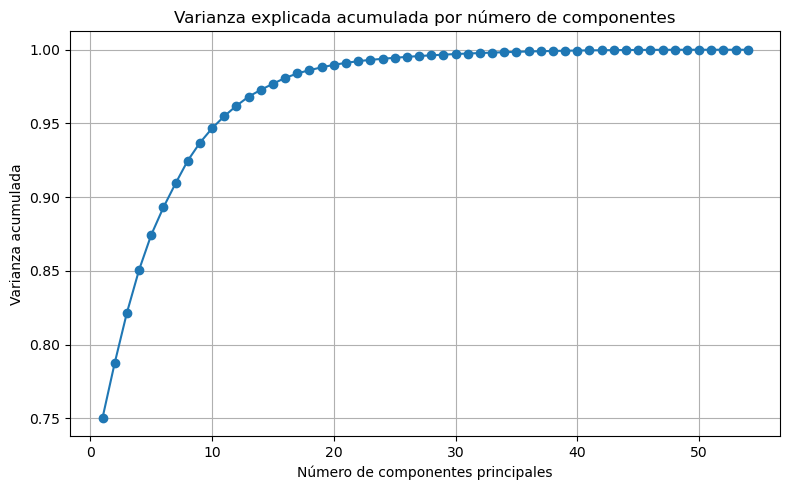

In [6]:
import matplotlib.pyplot as plt

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(pca_variance_df['n_componentes'], pca_variance_df['varianza_acumulada'], marker='o')
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# Aplicar PCA conservando solo 7 componentes
pca_7 = PCA(n_components=7)
pca_7_result = pca_7.fit_transform(scaled_data)

# Mostrar las primeras filas del resultado
pca_7_df = pd.DataFrame(pca_7_result, columns=[f'PC{i+1}' for i in range(7)])



In [8]:
pca_7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,18.103015,2.155338,-4.745383,0.025279,-5.930019,-1.103987,4.703878
1,2.018126,0.729663,-0.046180,2.086802,-0.111679,-0.513960,0.320513
2,3.596950,1.281980,-1.518943,0.794694,-1.163751,-0.133636,-1.137142
3,5.675902,0.557713,-0.097346,-0.177564,-0.987445,-0.237060,-0.368144
4,6.725887,-0.231499,0.640515,1.747973,1.040288,-1.131620,1.692724


C:\Users\Ximen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ximen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ximen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ximen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

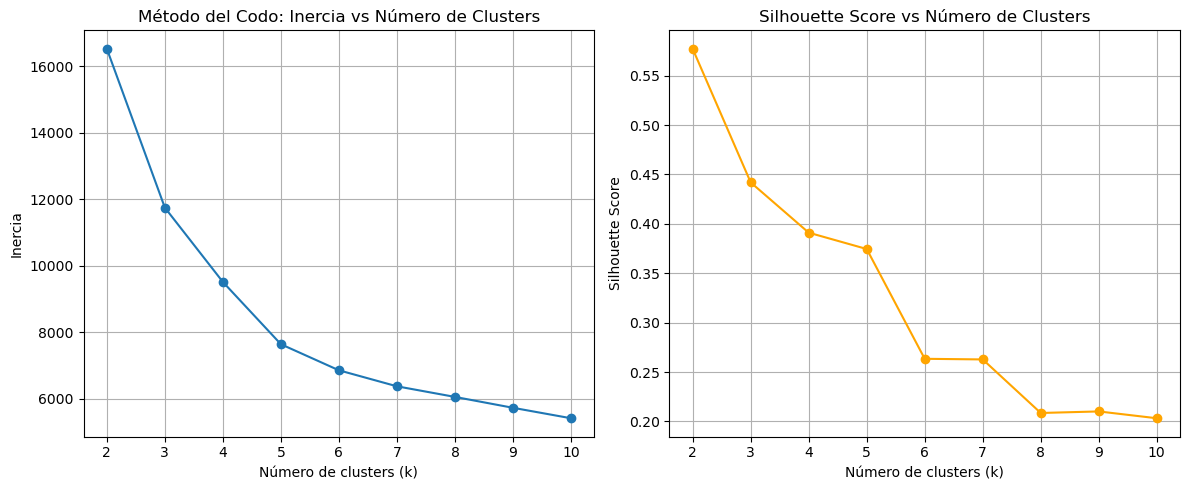

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores de k a evaluar
cluster_range = range(2, 11)

inertias = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_7_result)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_7_result, labels))

# Graficar resultados corregidos
plt.figure(figsize=(12, 5))

# Método del Codo
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Método del Codo: Inercia vs Número de Clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)

# Coeficiente de Silhouette
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Número de Clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
# Aplicar K-Means con k = 3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(pca_7_result)

# Añadir los labels al DataFrame de componentes principales
pca_7_df['cluster'] = cluster_labels




C:\Users\Ximen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [13]:
pca_7_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster
0,18.103015,2.155338,-4.745383,0.025279,-5.930019,-1.103987,4.703878,2
1,2.018126,0.729663,-0.046180,2.086802,-0.111679,-0.513960,0.320513,0
2,3.596950,1.281980,-1.518943,0.794694,-1.163751,-0.133636,-1.137142,0
3,5.675902,0.557713,-0.097346,-0.177564,-0.987445,-0.237060,-0.368144,0
4,6.725887,-0.231499,0.640515,1.747973,1.040288,-1.131620,1.692724,0


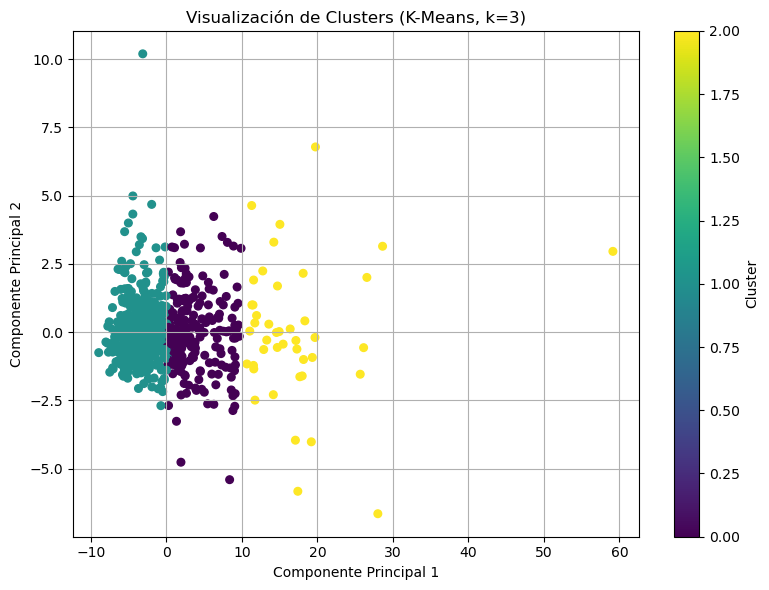

(0.4419328782058253, 0.8505620065552044, 619.4183652300419)

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calcular métricas de evaluación para el clustering con k=3
silhouette = silhouette_score(pca_7_result, cluster_labels)
davies_bouldin = davies_bouldin_score(pca_7_result, cluster_labels)
calinski_harabasz = calinski_harabasz_score(pca_7_result, cluster_labels)

# Visualización en 2D con las primeras 2 componentes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_7_result[:, 0], pca_7_result[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title('Visualización de Clusters (K-Means, k=3)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

(silhouette, davies_bouldin, calinski_harabasz)


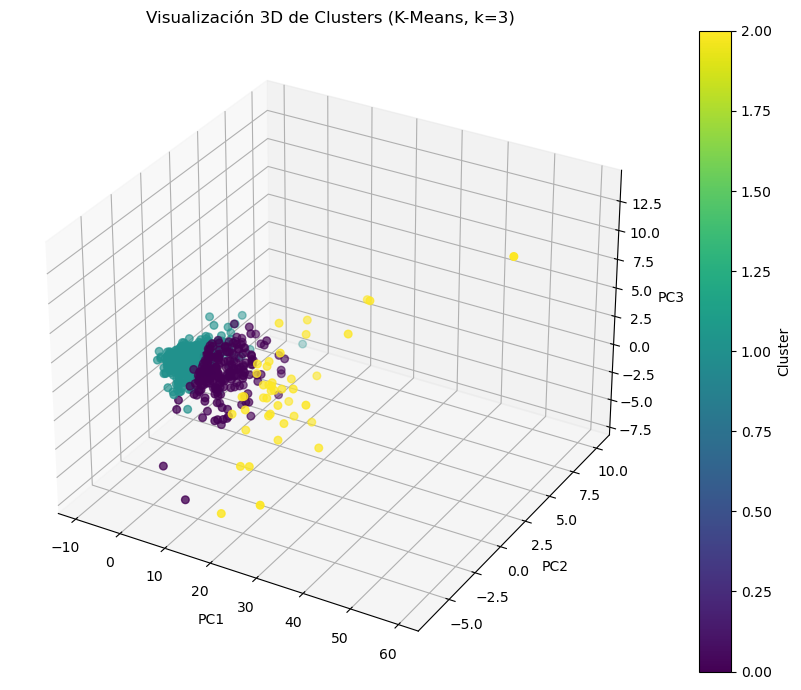

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Visualización 3D con las primeras tres componentes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    pca_7_result[:, 0], pca_7_result[:, 1], pca_7_result[:, 2],
    c=cluster_labels, cmap='viridis', s=30
)

ax.set_title('Visualización 3D de Clusters (K-Means, k=3)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(sc, label='Cluster')
plt.tight_layout()
plt.show()


In [17]:
# 4. Reconstruir nombres originales
original_columns = []
for col in dict_columns:
    original_columns.extend([f"{col}_{k}" for k in ordered_keys[col]])
original_columns.extend(['retiros_x_mes', 'arribos_x_mes'])

df_exploration = pd.DataFrame(full_matrix, columns=original_columns)
df_exploration['cluster'] = cluster_labels


In [23]:

# 5. Resumen por secciones
# Género
genero_columns = [col for col in df_exploration.columns if col.startswith("genero_x_mes_")]
genero_summary = df_exploration.groupby("cluster")[genero_columns].mean()
genero_summary.head()

,genero_x_mes_F,genero_x_mes_M,genero_x_mes_O
cluster,,,
0,2241.345735,5289.943839,149.115308
1,921.344269,2288.272429,66.215542
2,4519.333721,11005.709767,266.694186


In [24]:

# Edad
edad_columns = [col for col in df_exploration.columns if col.startswith("edad_x_mes_")]
edad_summary = df_exploration.groupby("cluster")[edad_columns].mean()
edad_summary.head()

,edad_x_mes_20-30,edad_x_mes_30-40,edad_x_mes_40-50,edad_x_mes_50-60,edad_x_mes_60-70,edad_x_mes_70<,edad_x_mes_<20
cluster,,,,,,,
0,2799.695261,2993.408910,1146.231469,467.126967,143.426967,25.396540,105.134976
1,1204.981226,1246.107264,498.730212,206.813184,58.992618,9.410047,50.804906
2,6072.790233,6043.763256,2242.414884,925.775581,239.570233,45.252093,222.221163


In [25]:

# Duración
duracion_columns = [col for col in df_exploration.columns if col.startswith("duraciones_x_mes_")]
duracion_summary = df_exploration.groupby("cluster")[duracion_columns].mean()

duracion_summary.head()

,duraciones_x_mes_0-10,duraciones_x_mes_10-20,duraciones_x_mes_20-30,duraciones_x_mes_30-45,duraciones_x_mes_45+
cluster,,,,,
0,3210.695592,2632.869858,1088.998341,640.046445,107.810142
1,1330.024693,1090.705071,507.395684,305.798868,41.915448
2,5762.186512,5821.166744,2459.813953,1469.833023,278.786512


In [26]:

# Días de la semana
dias_columns = [col for col in df_exploration.columns if col.startswith("dias_x_mes_")]
dias_summary = df_exploration.groupby("cluster")[dias_columns].mean()
dias_summary.head()

,dias_x_mes_Friday,dias_x_mes_Monday,dias_x_mes_Saturday,dias_x_mes_Sunday,dias_x_mes_Thursday,dias_x_mes_Tuesday,dias_x_mes_Wednesday
cluster,,,,,,,
0,1221.926493,1124.713033,842.763128,750.138910,1275.460379,1234.093365,1231.325355
1,523.622453,496.893797,329.971887,279.121415,557.136203,544.070377,545.023797
2,2495.278372,2274.360233,1700.612558,1663.678837,2616.135581,2521.235814,2520.483721


In [22]:

# 6. Identificación de variables distintivas
cluster_means = df_exploration.groupby('cluster').mean()
cluster_distribution = cluster_means.transpose()
cluster_distribution['range_max_min'] = cluster_distribution.max(axis=1) - cluster_distribution.min(axis=1)
top_variables = cluster_distribution.sort_values('range_max_min', ascending=False).head(20).drop(columns='range_max_min')


In [27]:
top_variables 

cluster,0,1,2
viajes_x_mes_2024-10,8548.483412,3628.905660,17833.302326
viajes_x_mes_2024-11,8138.696682,3429.143868,16598.279070
viajes_x_mes_2025-3,7618.284360,3275.240566,15558.465116
viajes_x_mes_2025-1,7511.327014,3239.099057,15378.651163
viajes_x_mes_2025-2,7237.791469,3121.825472,14893.302326
viajes_x_mes_2024-12,7027.943128,2960.823113,14488.720930
genero_x_mes_M,5289.943839,2288.272429,11005.709767
edad_x_mes_20-30,2799.695261,1204.981226,6072.790233
edad_x_mes_30-40,2993.408910,1246.107264,6043.763256
duraciones_x_mes_10-20,2632.869858,1090.705071,5821.166744
